In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from keras.utils import to_categorical
import sklearn
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import zipfile

In [3]:
path = "/content/drive/MyDrive/DATASETS/satelite.zip"
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

Imagem carregada com sucesso.



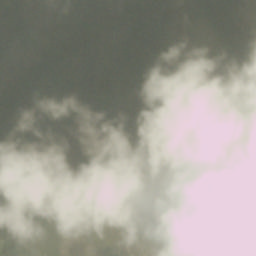

In [4]:
imagem_cloudy = "/content/data/cloudy/train_12.jpg"
img = cv2.imread(imagem_cloudy)
if img is not None:
    print("Imagem carregada com sucesso.\n")
else:
    print("Não foi possível carregar a imagem.") #problema no caminho

cv2_imshow(img)

# Carregando o dataset


In [5]:
images = []
labels = []
g = []

ROOT = "/content/data/"
for root, dirs, files in os.walk(ROOT):
  for f in files:
    # Converte o nome do arquivo para minúsculas antes de verificar a extensão
    if f.lower().endswith(("jpg", "jpeg")):
      img = cv2.imread(os.path.join(root, f))
      img = cv2.resize(img, (128,128))
      img = img/255
      images.append(img)
      if "train" in f:
        labels.append(0)
      elif "desert" in f:
        labels.append(1)
      elif "Forest" in f:
        labels.append(2)
      elif "SeaLake" in f:
        labels.append(3)

In [6]:
print(f'Qtd de images: {len(images)}')
print(f'Qtd de labels: {len(labels)}')

Qtd de images: 5631
Qtd de labels: 5631


2


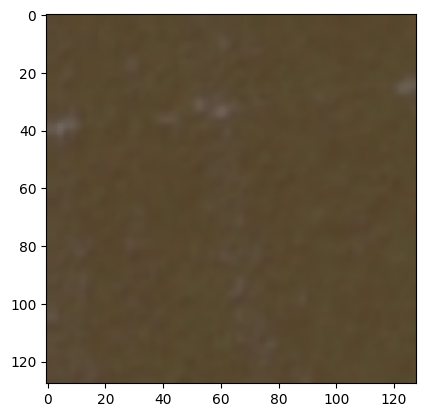

In [7]:
n = 0
plt.imshow(images[n])
print(labels[n])

In [8]:
X = np.array(images)

In [9]:
y = to_categorical(labels, num_classes=4)
print(y)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [10]:
X.shape, y.shape

((5631, 128, 128, 3), (5631, 4))

[0. 0. 0. 1.]


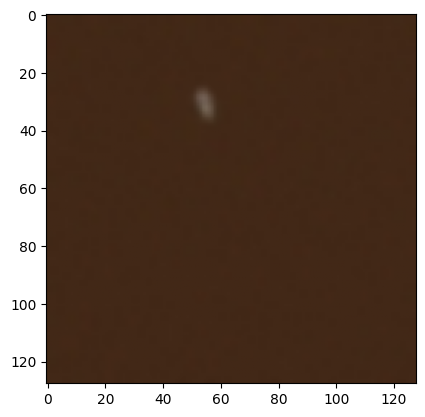

In [11]:
n = 4500
plt.imshow(X[n])
print(y[n])

# DIVISÃO DE DADOS


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)  #shuffle = True: embaralha os dados
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

3941
3941
1690
1690


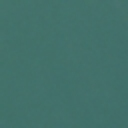

[0. 0. 0. 1.]


In [13]:
n = 0
cv2_imshow(X_train[n]*255)
print(y_train[n])

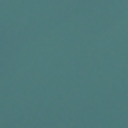

[0. 0. 0. 1.]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True) #shuffle = True: embaralha os dados novamente, para não embaralhar basta shuffle = False.

n = 0
cv2_imshow(X_train[n]*255)
print(y_train[n])

# CONSTRUÇÃO DO MODELO


In [15]:
def buildModel():
  network = Sequential()
  network.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu', padding='same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(256, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Flatten())
  network.add(Dense(units=32, activation='relu'))
  network.add(Dropout(0.3)) #30% dos neurônios serão aleatoriamente desativados durante o treinamento.
  network.add(Dense(units=4, activation='softmax')) #configurando para produzir saídas com quatro unidades na última camada, números de unidades da camada de saida tem que ser igual aos números de classes do problema
  return network

In [16]:
model = buildModel()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

# EXPERIMENTAÇÃO


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [19]:
X_train.shape, y_train.shape

((4504, 128, 128, 3), (4504, 4))

In [20]:
X_test.shape, y_test.shape

((1127, 128, 128, 3), (1127, 4))

In [21]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [22]:
historico = model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=10)

Epoch 1/10
127/127 [==============================] - 16s 33ms/step - loss: 0.7187 - accuracy: 0.6015 - precision: 0.6481 - recall: 0.5398 - val_loss: 0.4692 - val_accuracy: 0.7716 - val_precision: 0.7711 - val_recall: 0.7694
Epoch 2/10
127/127 [==============================] - 3s 20ms/step - loss: 0.5365 - accuracy: 0.7279 - precision: 0.7327 - recall: 0.7113 - val_loss: 0.4962 - val_accuracy: 0.6984 - val_precision: 0.6984 - val_recall: 0.6984
Epoch 3/10
127/127 [==============================] - 3s 20ms/step - loss: 0.5867 - accuracy: 0.6825 - precision: 0.6911 - recall: 0.6575 - val_loss: 0.4694 - val_accuracy: 0.7384 - val_precision: 0.7384 - val_recall: 0.7384
Epoch 4/10
127/127 [==============================] - 3s 21ms/step - loss: 0.5098 - accuracy: 0.7291 - precision: 0.7379 - recall: 0.7049 - val_loss: 0.3822 - val_accuracy: 0.8315 - val_precision: 0.8315 - val_recall: 0.8315
Epoch 5/10
127/127 [==============================] - 3s 24ms/step - loss: 0.4301 - accuracy: 0.815

In [23]:
predicoes = model.predict(X_test) # predicoes é uma matriz de probabilidades, onde cada linha corresponde a uma imagem de teste e cada coluna corresponde a uma classe

36/36 [==============================] - 1s 13ms/step


In [24]:
predicoes = np.argmax(predicoes, axis=1);

In [25]:
print(y_test)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [26]:
y_test = np.argmax(y_test, axis=1)

In [27]:
print(y_test)

[0 3 3 ... 0 1 1]


In [28]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       300
           1       0.93      0.97      0.95       227
           2       0.74      0.85      0.79       300
           3       0.79      0.71      0.75       300

    accuracy                           0.85      1127
   macro avg       0.86      0.86      0.86      1127
weighted avg       0.86      0.85      0.85      1127



## Holdout
